<a href="https://colab.research.google.com/github/vhrique/anne_ptbr/blob/main/Perceptron_Multicamadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _Perceptron_ Multicamadas

O _perceptron_ multicamadas é um modelo que possui um conjunto de perceptrons organizados em múltiplas camadas (conforme o nome).

Em sua forma mais simples, possuímos três camadas: a camada de entrada, a camada oculta, e a camada de saída.
A camada de entrada não possui _perceptrons_. Porém, é por ela que os sinais de entrada serão recebidos.
Na camada oculta, podemos ter diversos _perceptrons_ posicionados em paralelo.
Por fim, na camada de saída, temos um _perceptron_ (no caso de classificação binária).
<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/mlp.jpg?raw=true" width="600"></center>

É interessante observar que, enquanto os perceptrons da camada oculta recebem os sinais de entrada (multiplicados pelos pesos "sinápticos"), a camada de saída recebe os sinais emitidos pelos _perceptrons_ da camada oculta.
Isto é similar a como os dendritos (entradas) de um neurônio recebem sinais dos axônios (saídas) de outro neurônio, formando uma rede neural artificial.

Também é importante ressaltar que não estamos limitados a apenas três camadas. Podemos ter diversas camadas de perceptrons, cada uma recebendo sinais emitidos pela camada anterior e emitindo para a próxima camada.

Vejamos abaixo a implementação do perceptron multicamadas em Python.

In [ ]:
import numpy as np

In [ ]:
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, learning_rate=0.01, epochs=1000):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, 1)
        self.bias_output = np.zeros(1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, z):
        # sigmoid'(x) = sigmoid(x) * (1 - sigmoid(x))
        # Simplificando, com z = sigmoid(x)
        return z * (1 - z)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self._sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self._sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y):
        # Calcula o erro e o gradiente na camada de saída
        output_error = y - self.final_output
        output_delta = output_error * self._sigmoid_derivative(self.final_output)
        # Calcula o erro e o gradiente na camada oculta
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self._sigmoid_derivative(self.hidden_output)
        # Ajusta os pesos e viés por meio de gradient descent
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def fit(self, X, y):
        for _ in range(self.epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return self.forward(X)

Agora, realizamos o treino do _Perceptron_ Multicamadas no problema não-linear.
Da mesma forma que com o _perceptron_, realizamos o treino no método _fit_ e a previsão no método _predict_.

Percebe-se que este novo modelo consegue criar uma borda de decisão não-linear, classificando corretamente a maior parte dos exemplos.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [ ]:
def plot_decision_boundary(model, X, y, axis=None):
    xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), 0.01),
                         np.arange(X[:,1].min(), X[:,1].max(), 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if axis is None:
        plt.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        plt.scatter(X[y==0,0], X[y==0,1], s=10)
        plt.scatter(X[y==1,0], X[y==1,1], s=10)
        plt.xlim(X[:,0].min(), X[:,0].max())
        plt.ylim(X[:,1].min(), X[:,1].max())
        plt.xlabel('x0')
        plt.ylabel('x1')
    else:
        axis.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        axis.scatter(X[y==0,0], X[y==0,1], s=10)
        axis.scatter(X[y==1,0], X[y==1,1], s=10)
        axis.set_xlim(X[:,0].min(), X[:,0].max())
        axis.set_ylim(X[:,1].min(), X[:,1].max())
        axis.set_xlabel('x0')
        axis.set_ylabel('x1')

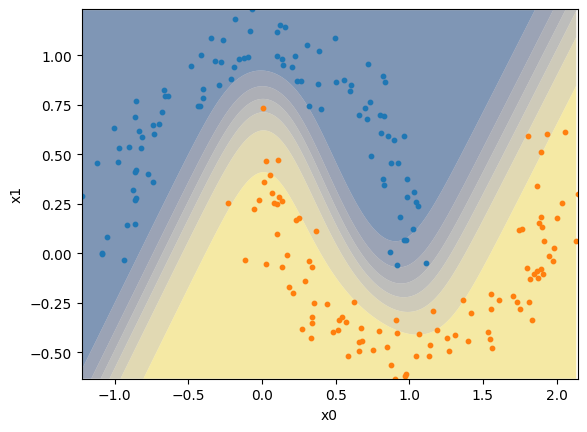

In [ ]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
y = np.expand_dims(y, axis=1)

model = MultilayerPerceptron(input_size=X.shape[1], hidden_size=3, epochs=10_000)
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y[:,0])
plt.show()

# Desbravando do Multilayer Perceptron

Vamos entender, então, como o Perceptron Multicamadas consegue resolver o problema proposto. Para isto, vamos analisar cada neurônio e entender um pouco sobre a função de ativação.

## Analisando a Camada Oculta

Para entender o que ocorre dentro deste modelo, vamos criar uma classe para facilitar o acesso à sua camada oculta.

In [ ]:
class MLProbe():
    def __init__(self, model, probe_position=0):
        self.model = model
        self.probe_position = probe_position

    def predict(self, X):
        self.model.forward(X)
        return model.hidden_output[:,self.probe_position]

Assim, vamos analisar separadamente a saída de cada um dos três _perceptrons_ da camada oculta.

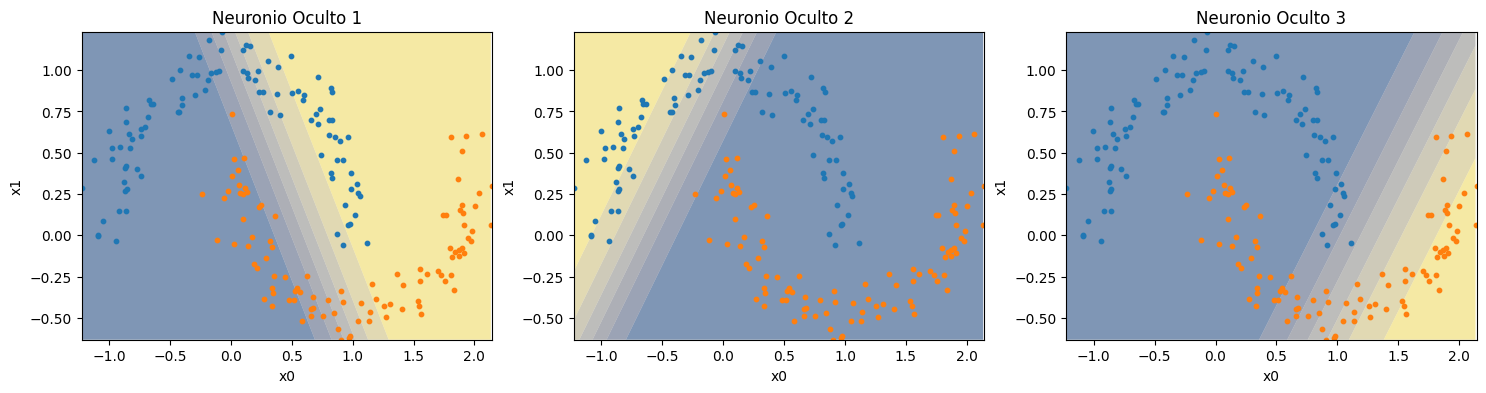

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18,4))
for i in range(3):
    probed_model = MLProbe(model, i)
    axs[i].set_title(f'Neuronio Oculto {i+1}')
    plot_decision_boundary(probed_model, X, y[:,0], axis=axs[i])

Conseguimos verificar que cada _perceptron_ da camada oculta cria uma borda de classificação linear, cada uma em uma região diferente. Ao combinarmos estas bordas de decisão no _perceptron_ da camada de saída, temos a saída com borda não-linear.

## Função de Ativação

Um ponto interessante que verificamos nas saídas dos perceptrons multicamadas é que a borda de classificação apresenta um variação gradual entre uma classe e outra. Isto ocorre porque, ao invés de utilizarmos a função de ativação do _perceptron_ original, utilizamos a função sigmóide, definida abaixo.

$$\delta(x) = \frac{1}{1+e^{-x}}$$

No gráfico a seguir conseguimos verificar o formato desta função, que parece um "S". Para valores muito baixos de $x$, o valor de saída da função é próximo a zero. Porém, a medida que $x$ se aproxima de 0, a saída começa a aumentar até chegar em 0.5. Após isto, enquanto o valor de $x$ aumenta, a saída da função aumenta até se aproximar do valor de 1.0.

De certa forma, esta função é parecida com a função de ativação do _perceptron_. Porém, esta função tem como característica ser contínua e derivável, o que permite o treinamento do perceptron multicamadas.

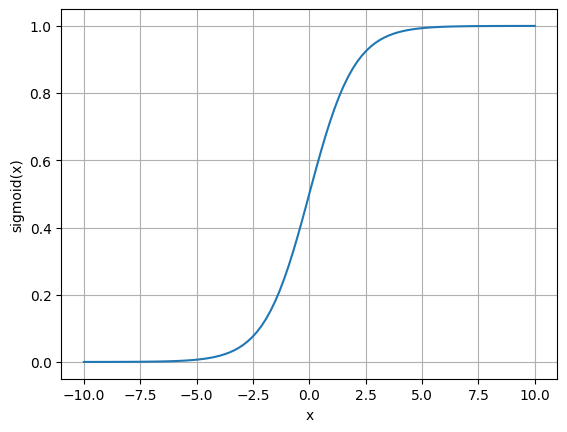

In [ ]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

## Otimização

Por fim, ocorre a etapa de otimização da rede neural, cujo propósito é ajustar os pesos do modelo de forma a minimizar o erro de predição. Isso é viabilizado pelo algoritmo de _backpropagation_, introduzido em 1986, um marco decisivo na história da inteligência artificial. A partir dos gradientes calculados por _backpropagation_, os parâmetros de redes neurais com múltiplas camadas podem ser atualizados iterativamente por meio do método de descida do gradiente, reduzindo progressivamente o erro do modelo.


# Exercícios


1. Modifique a chamada do Perceptron Multicamadas para utilizar apenas um _perceptron_ na camada oculta. Depois, utilize apenas dois _perceptrons_. Foi possível resolver o problema não-linear? Discuta a resposta e justifique.

1. Reproduza o código do Multilayer Perceptron utilizando Pytorch.

# Referências

- Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors. nature, 323(6088), 533-536.
